In [82]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import json
%matplotlib inline
sns.set()

In [83]:
# checkin
data = []
for line in open('../data/raw/yelp_dataset/yelp_academic_dataset_checkin.json', 'r'):
    data.append(json.loads(line))
checkin_df = pd.DataFrame(data)

In [84]:
# business
data = []
for line in open('../data/raw/yelp_dataset/yelp_academic_dataset_business.json', 'r'):
    data.append(json.loads(line))
business_df = pd.DataFrame(data)

In [ ]:
# # review
# data = []
# for line in open('../data/raw/yelp_dataset/yelp_academic_dataset_review.json', 'r'):
#     data.append(json.loads(line))
# review_df = pd.DataFrame(data)

In [ ]:
# # tip
# data = []
# for line in open('../data/raw/yelp_dataset/yelp_academic_dataset_tip.json', 'r'):
#     data.append(json.loads(line))
# tip_df = pd.DataFrame(data)

In [ ]:
# # user
# data = []
# for line in open('../data/raw/yelp_dataset/yelp_academic_dataset_user.json', 'r'):
#     data.append(json.loads(line))
# user_df = pd.DataFrame(data)

In [85]:
checkin_df.shape

(157075, 2)

In [86]:
set(checkin_df)

{'business_id', 'time'}

In [1]:
# df.iloc[0]['time']

In [87]:
sum(checkin_df.iloc[0]['time'].values())

151

In [88]:
i = 0
zeros = nonzeros = 0
checkins = []

for index, row in checkin_df.iterrows():
    i += 1
#     if i==4: break
    total_checkins_per_week = sum(row['time'].values())
    checkins.append(total_checkins_per_week)


In [28]:
tot = len(checkins)
print("Length of checkins:", tot)
print("Number of businesses (with checkins):", len(checkin_df))
print("Range:", min(checkins), "-", max(checkins))
zeros = checkins.count(0)
print("Businesses with 0 checkins:", zeros, zeros/tot)
ones = checkins.count(1)
print("Businesses with 1 checkin: {} ({:.3f}%)".format(ones, ones/tot))
print("Businesses with 2 checkins:", checkins.count(2))
print("Total number of checkins:", sum(checkins))
print("Number of unique checkin sums:", len(set(checkins)))


Length of checkins: 157075
Number of businesses (with checkins): 157075
Range: 1 - 138477
Businesses with 0 checkins: 0 0.0
Businesses with 1 checkin: 14513 (0.092%)
Businesses with 2 checkins: 10401
Total number of checkins: 17915884
Number of unique checkin sums: 2759


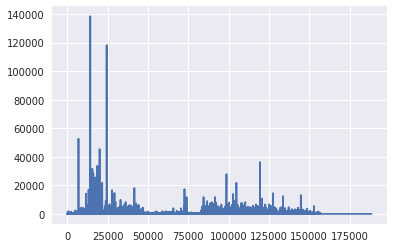

In [89]:
# checkins.sort()
checkins.extend([0]*(business_df.shape[0] - tot))
plt.plot(checkins)


In [90]:
print(checkins.index(max(checkins)))
print(checkin_df.iloc[14299])

14299
business_id                               FaHADZARwnY4yvlvpnsfGA
time           {'Fri-0': 1121, 'Mon-0': 1421, 'Sat-0': 1471, ...
Name: 14299, dtype: object


In [27]:
business_df.head(1)

,address,attributes,business_id,categories,city,hours,is_open,latitude,longitude,name,neighborhood,postal_code,review_count,stars,state
0,1314 44 Avenue NE,"{'BikeParking': 'False', 'BusinessAcceptsCredi...",Apn5Q_b6Nz61Tq4XzPdf9A,"Tours, Breweries, Pizza, Restaurants, Food, Ho...",Calgary,"{'Monday': '8:30-17:0', 'Tuesday': '11:0-21:0'...",1,51.091813,-114.031675,Minhas Micro Brewery,,T2E 6L6,24,4.0,AB


In [30]:
business_df.loc[business_df['business_id']=='FaHADZARwnY4yvlvpnsfGA']

,address,attributes,business_id,categories,city,hours,is_open,latitude,longitude,name,neighborhood,postal_code,review_count,stars,state
144873,5757 Wayne Newton Blvd,{'WiFi': 'free'},FaHADZARwnY4yvlvpnsfGA,"Airports, Hotels & Travel",Las Vegas,"{'Monday': '0:0-0:0', 'Tuesday': '0:0-0:0', 'W...",1,36.085016,-115.151009,McCarran International Airport,Southeast,89119,3481,3.5,NV


In [12]:
def ranges(p):
    q = sorted(p)
    i = 0
    for j in range(1,len(q)):
        if q[j] > 1+q[j-1]:
            yield (q[i],q[j-1])
            i = j
    yield (q[i], q[-1])
    
# print(list(ranges(checkins)))

In [91]:
top_checkins = sorted(range(len(checkins)), key=lambda x: checkins[x])[-10:]
business_df.loc[business_df['business_id'].isin([checkin_df.iloc[x]['business_id'] for x in top_checkins])]

,address,attributes,business_id,categories,city,hours,is_open,latitude,longitude,name,neighborhood,postal_code,review_count,stars,state
14413,5030 Spring Mountain Rd,"{'Alcohol': 'none', 'BikeParking': 'False', 'B...",IZivKqtHyz4-ts8KsnvMrA,"Juice Bars & Smoothies, Restaurants, Food, Bub...",Las Vegas,"{'Monday': '11:0-23:0', 'Tuesday': '11:0-23:0'...",1,36.127020,-115.209644,Kung Fu Tea,Chinatown,89146,1176,4.5,NV
38398,"3400 E Sky Harbor Blvd, Ste 3300",{'WiFi': 'free'},JmI9nslLD7KZqRr__Bg6NQ,"Airports, Hotels & Travel",Phoenix,"{'Monday': '0:0-0:0', 'Tuesday': '0:0-0:0', 'W...",1,33.435996,-112.010842,Phoenix Sky Harbor International Airport,,85034,2391,3.5,AZ
54099,5501 Josh Birmingham Pkwy,{'WiFi': 'free'},yQab5dxZzgBLTEHCw9V7_w,"Airports, Hotels & Travel",Charlotte,"{'Monday': '0:0-0:0', 'Tuesday': '0:0-0:0', 'W...",1,35.220559,-80.943874,Charlotte Douglas International Airport,,28208,1732,3.5,NC
68042,3355 South Las Vegas Boulevard,"{'BusinessAcceptsCreditCards': 'True', 'GoodFo...",Wxxvi3LZbHNIDwJ-ZimtnA,"Arts & Entertainment, Casinos, Hotels, Hotels ...",Las Vegas,"{'Monday': '0:0-0:0', 'Tuesday': '0:0-0:0', 'W...",1,36.121189,-115.169657,The Venetian Las Vegas,The Strip,89109,3329,4.0,NV
116244,3708 Las Vegas Blvd S,"{'BusinessAcceptsCreditCards': 'True', 'GoodFo...",5LNZ67Yw9RD6nf4_UhXOjw,"Event Planning & Services, Casinos, Hotels, Ar...",Las Vegas,"{'Monday': '0:0-0:0', 'Tuesday': '0:0-0:0', 'W...",1,36.109755,-115.173877,The Cosmopolitan of Las Vegas,The Strip,89109,4097,4.0,NV
129493,3600 S Las Vegas Blvd,"{'BusinessAcceptsCreditCards': 'True', 'GoodFo...",na4Th5DrNauOv-c43QQFvA,"Casinos, Arts & Entertainment, Event Planning ...",Las Vegas,"{'Monday': '0:0-0:0', 'Tuesday': '0:0-0:0', 'W...",1,36.112629,-115.176706,Bellagio Hotel,The Strip,89109,3030,3.5,NV
141265,3799 Las Vegas Blvd S,"{'BusinessAcceptsCreditCards': 'True', 'Restau...",El4FC8jcawUVgw_0EIcbaQ,"Arts & Entertainment, Hotels & Travel, Event P...",Las Vegas,"{'Monday': '0:0-0:0', 'Tuesday': '0:0-0:0', 'W...",1,36.102251,-115.169968,MGM Grand Hotel,The Strip,89109,3730,3.0,NV
144873,5757 Wayne Newton Blvd,{'WiFi': 'free'},FaHADZARwnY4yvlvpnsfGA,"Airports, Hotels & Travel",Las Vegas,"{'Monday': '0:0-0:0', 'Tuesday': '0:0-0:0', 'W...",1,36.085016,-115.151009,McCarran International Airport,Southeast,89119,3481,3.5,NV
158020,3570 Las Vegas Blvd S,"{'BusinessAcceptsCreditCards': 'True', 'GoodFo...",VyjyHoBg3KC5BSFRlD0ZPQ,"Hotels, Arts & Entertainment, Event Planning &...",Las Vegas,"{'Monday': '0:0-0:0', 'Tuesday': '0:0-0:0', 'W...",1,36.116765,-115.174595,Caesars Palace Las Vegas Hotel & Casino,The Strip,89109,2627,3.0,NV
174882,3730 Las Vegas Blvd S,"{'BusinessAcceptsCreditCards': 'True', 'GoodFo...",SMPbvZLSMMb7KU76YNYMGg,"Hotels & Travel, Resorts, Arts & Entertainment...",Las Vegas,"{'Monday': '0:0-0:0', 'Tuesday': '0:0-0:0', 'W...",1,36.107621,-115.177040,ARIA Resort & Casino,The Strip,89109,4041,3.5,NV


In [92]:
print(business_df['state'].describe())
print(business_df.shape[0] - tot)

count     188593
unique        69
top           AZ
freq       56495
Name: state, dtype: object
31518


In [100]:
print("Mean:", np.mean(checkins))
print("SD:", np.std(checkins))
print("Median:", np.median(checkins))

Mean: 94.99760860689422
SD: 654.2602269799182
Median: 10.0


In [102]:
import itertools

def random_normalizer(x):
    if x <= 94.99760:
        return 1
    else:
        return x//654.260 + 2
    
checkins_sd_bins = [random_normalizer(x) for x in checkins]
checkins_sd_bins.sort()
checkins_sd_bins_sizes = [(g[0], len(list(g[1]))) for g in itertools.groupby(checkins_sd_bins)]
print(checkins_sd_bins_sizes)
print(158858/len(checkins))

[(1, 158858), (2.0, 24572), (3.0, 2981), (4.0, 993), (5.0, 432), (6.0, 254), (7.0, 129), (8.0, 105), (9.0, 70), (10.0, 44), (11.0, 24), (12.0, 17), (13.0, 15), (14.0, 10), (15.0, 8), (16.0, 6), (17.0, 5), (18.0, 6), (19.0, 6), (20.0, 6), (21.0, 2), (22.0, 5), (23.0, 5), (24.0, 6), (25.0, 1), (26.0, 2), (27.0, 4), (28.0, 2), (29.0, 2), (30.0, 1), (31.0, 1), (32.0, 2), (35.0, 5), (40.0, 2), (41.0, 1), (44.0, 1), (45.0, 1), (46.0, 1), (48.0, 1), (50.0, 1), (53.0, 1), (57.0, 1), (71.0, 1), (82.0, 1), (182.0, 1), (213.0, 1)]
0.8423324301538233


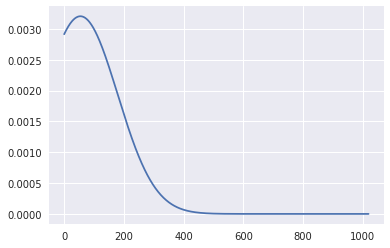

In [95]:
import scipy.stats as stats
import pylab as pl

h = [] + checkins
h.sort()
h = h[:-3000]
hmean = np.mean(h)
hstd = np.std(h)
pdf = stats.norm.pdf(h, hmean, hstd)
plt.plot(h, pdf) # including h here is crucial